# Essential Libraries and Data

In this section, we import the necessary libraries to perform Exploratory Data Analysis (EDA) and load the accident dataset for analysis.

## Libraries

We use the following libraries:
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Seaborn**: For statistical data visualization.
- **Matplotlib**: For general data visualization and plotting.

## Loading Data

The dataset is loaded using **Pandas'** `read_csv` function, which allows us to read data from a CSV file. The dataset contains accident-related data, including variables such as accident severity, time, weather conditions, road types, and more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\anant\\OneDrive\\Documents\\Desktop\\Data science\\Data set\\bike_dataset.csv')

## Data Cleaning
This section focuses on handling missing values, correcting data types, and preparing the dataset for analysis.


In [2]:

df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
data=df.dropna(subset=['Purchase_Date'], inplace = True)
print(df.head())

  Transaction_ID   Customer_Name  Phone_Number                        Email  \
0        TID0001  Jayant Solanki  917659077670  bhardwajkeya@bumb-konda.com   
1        TID0002   Khushi Doctor  916661389819               ivig@gmail.com   
2        TID0003    Miraya Dutta  918941657862             bsami@biswas.org   
3        TID0004    Shalv Sarkar  917956910592     dhanushkanda@hotmail.com   
4        TID0005    Darshit Buch  916312155693              tdani@yahoo.com   

           Address         City State Bike_Model Bike_Type  Engine_Capacity  \
0   26 Main Street      Chicago    CA    Model B   Cruiser              150   
1  575 Main Street  Los Angeles    AZ    Model D   Cruiser              300   
2   95 Main Street      Houston    NY    Model C      Dirt              500   
3  592 Main Street  Los Angeles    NY    Model A   Cruiser              250   
4  215 Main Street      Chicago    NY    Model E   Cruiser              500   

   Color  Price       Purchase_Date Payment_Mode S

In [3]:
# df.dtypes
# df.shape
popular=df['Bike_Type'].value_counts()
print(popular)

Bike_Type
Touring     220
Cruiser     211
Dirt        196
Electric    191
Sport       182
Name: count, dtype: int64


In [4]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of     Transaction_ID   Customer_Name  Phone_Number                        Email  \
0          TID0001  Jayant Solanki  917659077670  bhardwajkeya@bumb-konda.com   
1          TID0002   Khushi Doctor  916661389819               ivig@gmail.com   
2          TID0003    Miraya Dutta  918941657862             bsami@biswas.org   
3          TID0004    Shalv Sarkar  917956910592     dhanushkanda@hotmail.com   
4          TID0005    Darshit Buch  916312155693              tdani@yahoo.com   
..             ...             ...           ...                          ...   
995        TID0996    Vihaan Reddy  917694496678       sundaramemir@ratta.org   
996        TID0997     Riaan Uppal  917321048099   drishyadhingra@hotmail.com   
997        TID0998     Seher Kumer  916378847276          keyaravel@comar.org   
998        TID0999      Nakul Mani  917396920888  akrishnan@krishnamurthy.biz   
999        TID1000      Biju Sarma  917261217101              qyog

In [5]:
df.isnull().sum()

Transaction_ID                0
Customer_Name                 0
Phone_Number                  0
Email                         0
Address                       0
City                          0
State                         0
Bike_Model                    0
Bike_Type                     0
Engine_Capacity               0
Color                         0
Price                         0
Purchase_Date                 0
Payment_Mode                  0
Sales_Executive               0
Showroom_Location             0
Accessories_Added           202
Insurance_Provider            0
Warranty_Period               0
Customer_Feedback_Rating      0
dtype: int64

# Statistical Analysis

In this section, we perform a statistical analysis to explore relationships between different variables in the dataset. This includes calculating correlation and covariance, which are key to understanding the dependencies between variables, as well as performing additional tests to assess trends and associations.

In [6]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
print(numeric_data)

     Phone_Number  Engine_Capacity  Price  Customer_Feedback_Rating
0    917659077670              150   7848                         5
1    916661389819              300  14115                         2
2    918941657862              500   6423                         3
3    917956910592              250  12628                         2
4    916312155693              500  10354                         1
..            ...              ...    ...                       ...
995  917694496678              300  24349                         5
996  917321048099              150  24310                         2
997  916378847276              250  12519                         2
998  917396920888              300   7493                         3
999  917261217101              250  12695                         2

[1000 rows x 4 columns]


In [7]:
stat_an=numeric_data.describe()
print(stat_an)

       Phone_Number  Engine_Capacity         Price  Customer_Feedback_Rating
count  1.000000e+03       1000.00000   1000.000000               1000.000000
mean   9.180449e+11        281.00000  14705.584000                  2.985000
std    1.142007e+09        119.24017   5798.698416                  1.413072
min    9.160020e+11        150.00000   5101.000000                  1.000000
25%    9.170306e+11        200.00000   9645.000000                  2.000000
50%    9.181264e+11        250.00000  14837.000000                  3.000000
75%    9.189736e+11        300.00000  19748.500000                  4.000000
max    9.199969e+11        500.00000  24977.000000                  5.000000


# Correlation Analysis

In this part of the analysis, we compute the correlation matrix for the numeric variables in the dataset. Correlation helps in understanding the relationship between two or more variables. It indicates whether and how strongly pairs of variables are related. The `corr()` function in Pandas is used to compute the pairwise correlation of columns in the DataFrame. A correlation value close to 1 or -1 indicates a strong relationship, while a value near 0 indicates no correlation.

In [8]:
corelation=numeric_data.corr()
print(corelation)

                          Phone_Number  Engine_Capacity     Price  \
Phone_Number                  1.000000        -0.035719 -0.022827   
Engine_Capacity              -0.035719         1.000000 -0.035217   
Price                        -0.022827        -0.035217  1.000000   
Customer_Feedback_Rating      0.034750         0.019991  0.039172   

                          Customer_Feedback_Rating  
Phone_Number                              0.034750  
Engine_Capacity                           0.019991  
Price                                     0.039172  
Customer_Feedback_Rating                  1.000000  


# Covariance Analysis

Covariance is a statistical measure that helps in understanding how two variables change together. Unlike correlation, covariance does not normalize the values, so the magnitude depends on the units of the variables. A positive covariance means that both variables tend to increase together, while a negative covariance indicates that one variable increases when the other decreases. The `cov()` function in Pandas is used to calculate the covariance matrix between numeric columns in the DataFrame.



In [9]:
covarience=numeric_data.cov()
print(covarience)

                          Phone_Number  Engine_Capacity         Price  \
Phone_Number              1.304181e+18    -4.864012e+09 -1.511642e+11   
Engine_Capacity          -4.864012e+09     1.421822e+04 -2.435060e+04   
Price                    -1.511642e+11    -2.435060e+04  3.362490e+07   
Customer_Feedback_Rating  5.607668e+07     3.368368e+00  3.209727e+02   

                          Customer_Feedback_Rating  
Phone_Number                          5.607668e+07  
Engine_Capacity                       3.368368e+00  
Price                                 3.209727e+02  
Customer_Feedback_Rating              1.996772e+00  


                          Phone_Number  Engine_Capacity         Price  \
Phone_Number              1.304181e+18    -4.864012e+09 -1.511642e+11   
Engine_Capacity          -4.864012e+09     1.421822e+04 -2.435060e+04   
Price                    -1.511642e+11    -2.435060e+04  3.362490e+07   
Customer_Feedback_Rating  5.607668e+07     3.368368e+00  3.209727e+02   

                          Customer_Feedback_Rating  
Phone_Number                          5.607668e+07  
Engine_Capacity                       3.368368e+00  
Price                                 3.209727e+02  
Customer_Feedback_Rating              1.996772e+00  


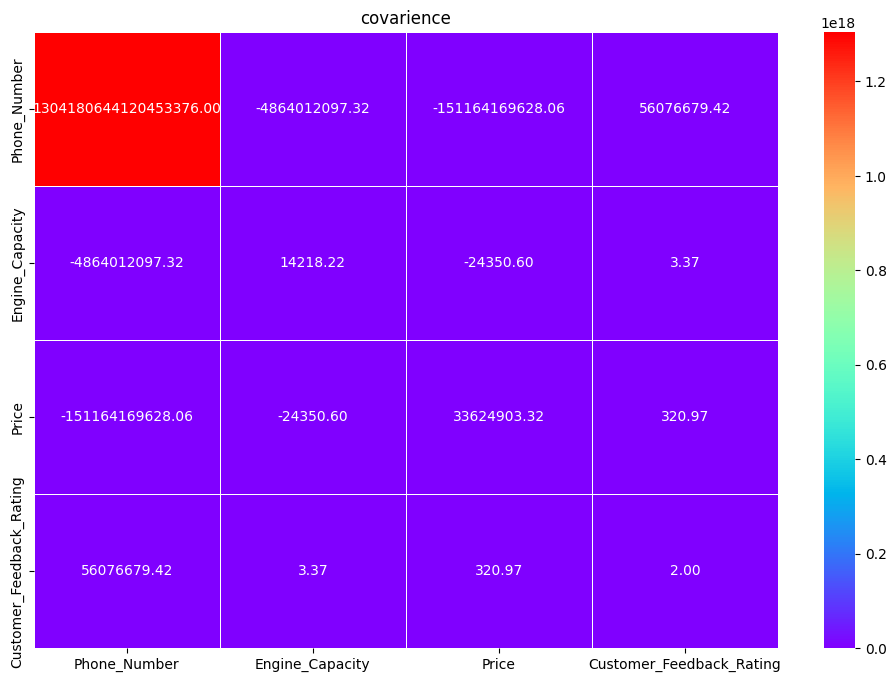

In [10]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])

covarience=numeric_data.cov()
print(covarience)
plt.figure(figsize=(12,8))
sns.heatmap(covarience,cmap='rainbow',annot=True,fmt='.2f',linewidths=0.5)
plt.title("covarience")
plt.show()

# Questions
### 1: What is the distribution of bikes sold across different bike models?


Bike_Model
Model D    215
Model B    201
Model A    196
Model E    196
Model C    192
Name: count, dtype: int64


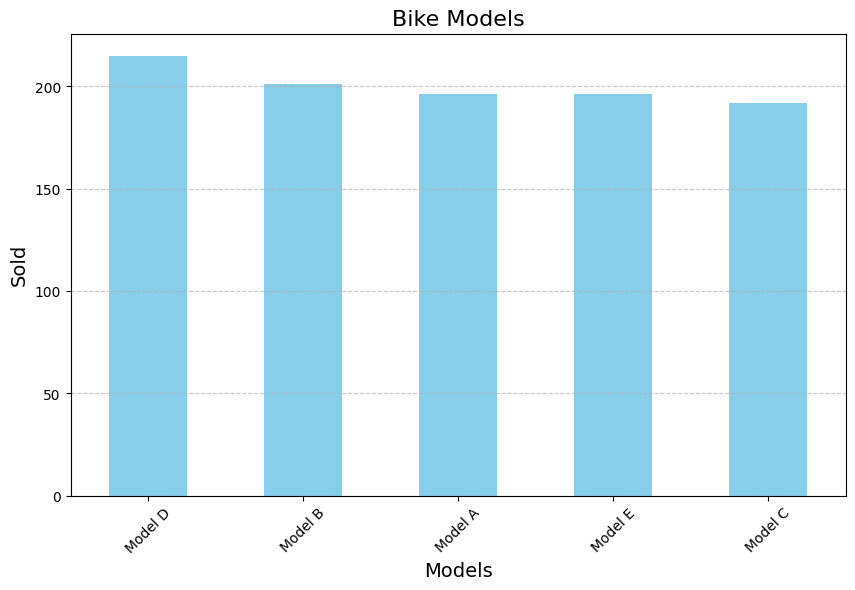

In [11]:
import pandas as pd
data=pd.read_csv('C:\\Users\\anant\\OneDrive\\Documents\\Desktop\\Data science\\Data set\\bike_dataset.csv')
bike_model_distribution = data['Bike_Model'].value_counts()
print(bike_model_distribution)
bike_model_distribution.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Bike Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Sold', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2: Which bike type (e.g., Cruiser, Dirt) is the most popular?


Bike_Type
Touring     220
Cruiser     211
Dirt        196
Electric    191
Sport       182
Name: count, dtype: int64


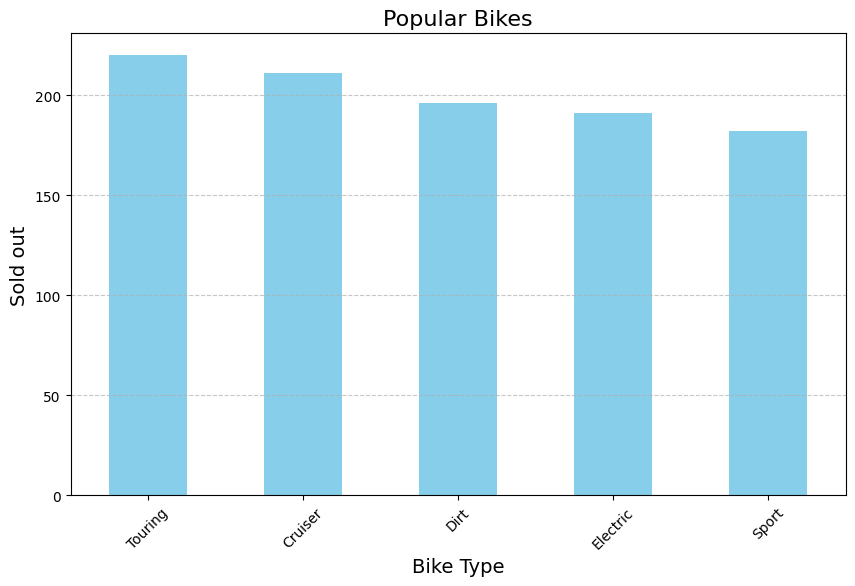

In [12]:
popular=data['Bike_Type'].value_counts()
print(popular)
popular.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Popular Bikes', fontsize=16)
plt.xlabel('Bike Type', fontsize=14)
plt.ylabel('Sold out', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3: What is the average price of bikes based on engine capacity?


Engine_Capacity
150    14678.864583
200    14414.467005
250    15275.057895
300    15065.690265
500    14053.769231
Name: Price, dtype: float64


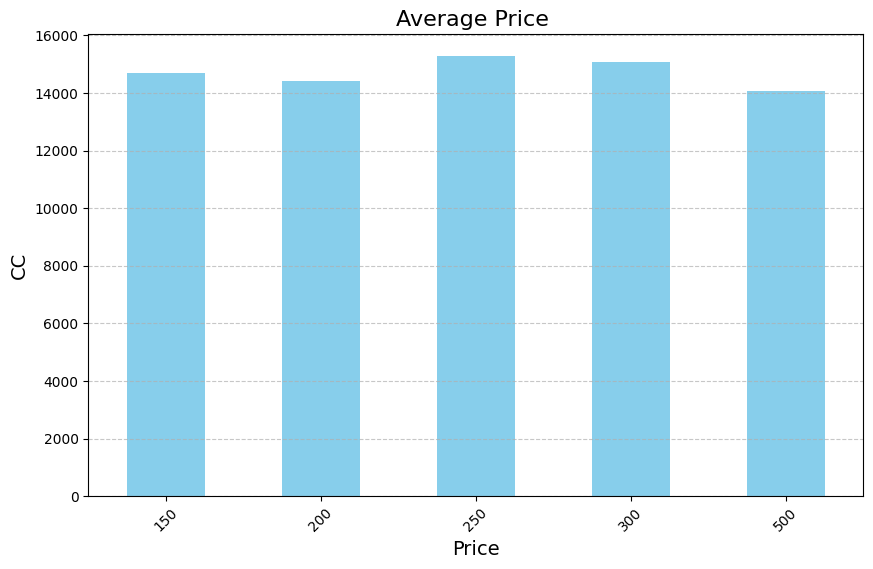

In [13]:
price_engine_capacity=data.groupby('Engine_Capacity')['Price'].mean()

print(price_engine_capacity)
price_engine_capacity.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Price ', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('CC', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4: How does the price vary by bike color?


Color
Black    14623.917526
Blue     15063.158974
Green    14249.668478
Red      15036.293578
White    14504.196172
Name: Price, dtype: float64


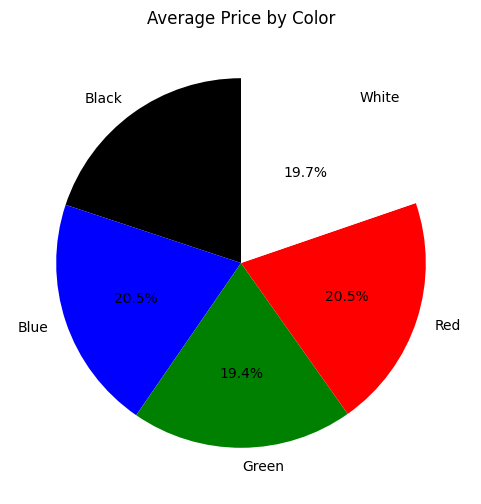

In [14]:
price_by_color=data.groupby('Color')['Price'].mean()
print(price_by_color)
custom_colors = ['black', 'blue', 'green', 'red', 'white']
price_by_color.plot.pie(figsize=(6, 6),autopct='%1.1f%%',startangle=90,colors=custom_colors,title="Average Price by Color"  )
plt.ylabel("")  
plt.show()

### 5: Which city has the highest number of purchases?


City
Houston        221
Chicago        210
Los Angeles    201
Phoenix        190
New York       178
Name: count, dtype: int64


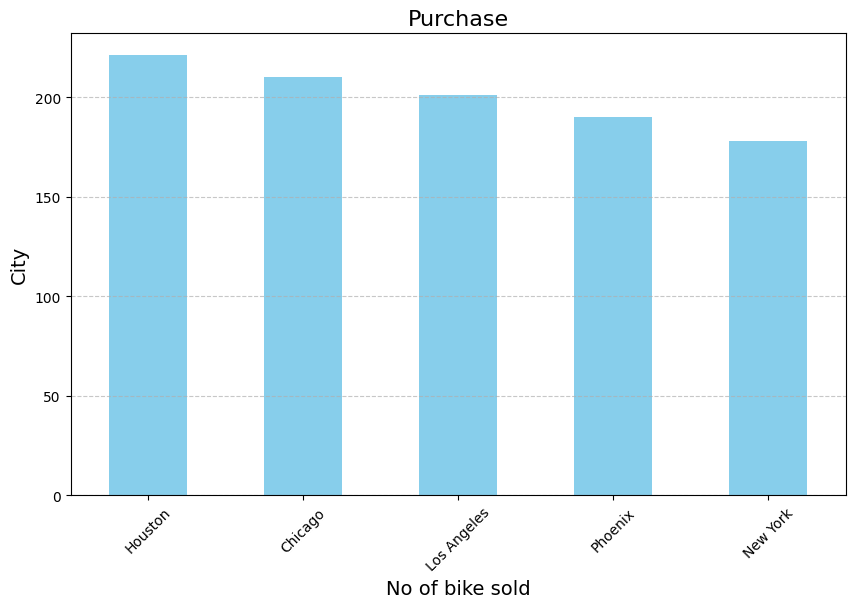

In [15]:
purchase=data['City'].value_counts()
print(purchase)
purchase.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Purchase', fontsize=16)
plt.xlabel('No of bike sold', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 6: What is the most common payment mode?


In [16]:
payment=data['Payment_Mode'].value_counts()
print(payment)

Payment_Mode
Bank Transfer    236
Credit Card      213
Cash             200
UPI              184
Loan             167
Name: count, dtype: int64


### 7:Which salesperson has the highest sales revenue?


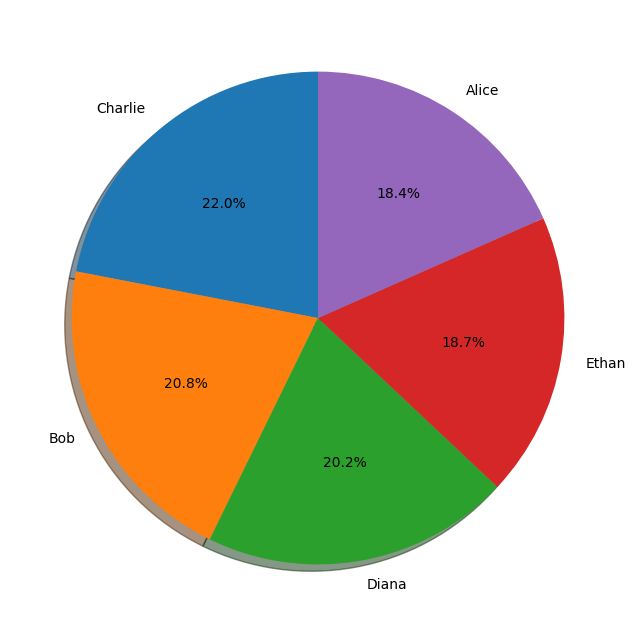

Sales_Executive
Charlie    3230515
Bob        3058001
Diana      2973179
Ethan      2742979
Alice      2700910
Name: Price, dtype: int64


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

revenue=df.groupby('Sales_Executive')['Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
plt.pie(revenue,labels=revenue.index,autopct='%1.1f%%', startangle=90, shadow=True)
plt.show()
print(revenue)

### 8:What is the average feedback rating for each showroom location?


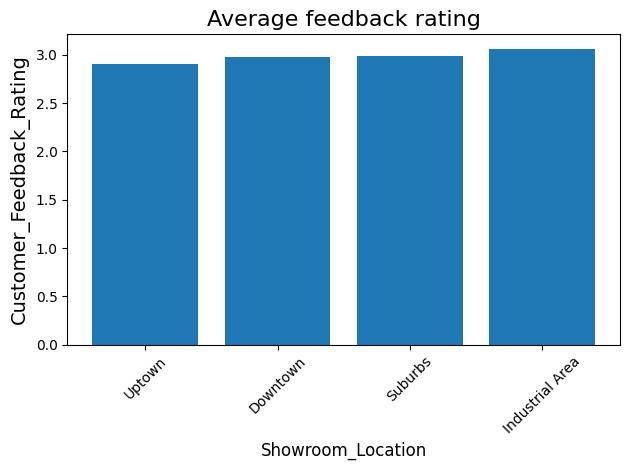

Showroom_Location
Uptown             2.905738
Downtown           2.981203
Suburbs            2.991561
Industrial Area    3.059289
Name: Customer_Feedback_Rating, dtype: float64


In [18]:
feedback=df.groupby('Showroom_Location')['Customer_Feedback_Rating'].mean().sort_values(ascending=True)
plt.Figure(figsize=(10,6))
plt.bar(feedback.index,feedback)
plt.xlabel('Showroom_Location',fontsize=12)
plt.ylabel('Customer_Feedback_Rating',fontsize=14)
plt.title('Average feedback rating',fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()
print(feedback)

### 9: Which accessories are the most frequently purchased?


Accessories_Added
Gloves     209
Top Box    202
Helmet     199
Cover      188
Name: count, dtype: int64


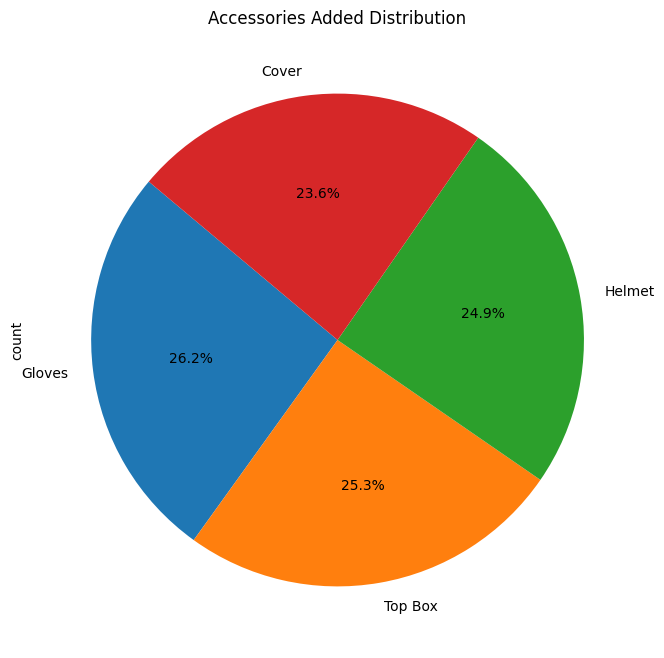

In [19]:
accessories=df['Accessories_Added'].value_counts()
plt.figure(figsize=(8, 8))
accessories.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Accessories Added Distribution')
print(accessories)

### 10: What is the correlation between engine capacity and price?


In [20]:
correlation=df['Engine_Capacity'].corr(df['Price'])
print(correlation)

-0.035217347201027344


### 11: How does feedback rating vary by warranty period?


In [21]:
vary=data.groupby('Warranty_Period')['Customer_Feedback_Rating'].mean().sort_values(ascending=True)
print(vary)

Warranty_Period
1 Year     2.971182
2 Years    2.981481
3 Years    3.003040
Name: Customer_Feedback_Rating, dtype: float64


### 12: What is the time trend for bike purchases across months in 2023?


In [22]:

monthly_purchases = data[pd.to_datetime(data['Purchase_Date']).dt.year == 2023]['Purchase_Date'].apply(pd.to_datetime).dt.month.value_counts().sort_index()
print(monthly_purchases)


Purchase_Date
1      94
2      73
3      78
4      70
5      98
6      75
7      92
8      86
9     100
10     77
11     85
12     72
Name: count, dtype: int64


### 13: Which insurance provider is preferred the most?


In [23]:
insurance=data['Insurance_Provider'].value_counts()
print(insurance)

Insurance_Provider
ICICI Lombard          228
HDFC Ergo              213
New India Assurance    198
Bajaj Allianz          188
Tata AIG               173
Name: count, dtype: int64


### 14: How many bikes are sold in each state?


In [24]:
sold=data['State'].value_counts()
print(sold)

State
IL    216
CA    205
TX    203
AZ    192
NY    184
Name: count, dtype: int64


### 15: What is the distribution of engine capacities among sold bikes?


In [25]:
engine=data['Engine_Capacity'].value_counts()
print(engine)

Engine_Capacity
300    226
200    197
500    195
150    192
250    190
Name: count, dtype: int64


### 16: Is there a relationship between payment mode and feedback rating?


In [26]:
relationship=data.groupby('Payment_Mode')['Customer_Feedback_Rating'].mean()
print(relationship)

Payment_Mode
Bank Transfer    2.927966
Cash             2.930000
Credit Card      3.103286
Loan             3.011976
UPI              2.956522
Name: Customer_Feedback_Rating, dtype: float64


### 17: How does the number of purchases vary across different showroom locations?


In [27]:
purchase=data['Showroom_Location'].value_counts()
print(purchase)

Showroom_Location
Downtown           266
Industrial Area    253
Uptown             244
Suburbs            237
Name: count, dtype: int64


### 18: Are customers with longer warranties more satisfied (higher feedback rating)?


In [28]:
satisfied=data.groupby('Warranty_Period')['Customer_Feedback_Rating'].mean()
print(satisfied)

Warranty_Period
1 Year     2.971182
2 Years    2.981481
3 Years    3.003040
Name: Customer_Feedback_Rating, dtype: float64


# Summary

The dataset reveals interesting insights into bike sales and customer feedback. The average price of bikes is ₹14,706, with prices ranging from ₹5,101 to ₹24,977. Engine capacities span from 150 cc to 500 cc, with an average of 281 cc. Customer feedback ratings average at 3.0, indicating moderate satisfaction overall.

Touring and Cruiser bikes are the most popular categories, accounting for 220 and 211 sales respectively, while Sport bikes are less common with 182 sales. Despite their lower sales volume, Sport bikes achieve the highest average customer feedback rating of 3.07, suggesting higher satisfaction among their buyers. Conversely, Dirt bikes, with an average rating of 2.87, appear to be less favored by customers.

The distribution of bike prices is wide, with a notable concentration between ₹10,000 and ₹20,000. This range could represent the sweet spot for affordability and value. These findings provide valuable insights into customer preferences and could guide marketing or inventory decisions.